# Project Analysis

In [17]:
import psycopg2
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def connect_and_query(query: str, params):
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        database="mp_dump",
        user="postgres",
        password="changeme"
    )

    cur = conn.cursor()

    cur.execute(query, params)
    res = cur.fetchall()

    cur.close()

    return res

In [88]:
def get_number_of_services_per_project():
    query = """
        SELECT COUNT(*)
        FROM projects, offers, services, project_items
        WHERE project_items.offer_id = offers.id AND offers.service_id = services.id AND project_items.project_id = projects.id
        GROUP BY projects.id
    """
    res = pd.DataFrame(connect_and_query(query, ()), columns=["services_numb"])
    
    return res


def get_number_of_projects_per_user():
    query = """
        SELECT COUNT(*)
        FROM projects
        GROUP BY projects.user_id
    """
    res = pd.DataFrame(connect_and_query(query, ()), columns=["projects_numb"])
    
    return res


def get_number_of_services_added_to_projects_per_user():
    query = """
        SELECT COUNT(*)
        FROM projects, offers, services, project_items
        WHERE project_items.offer_id = offers.id AND offers.service_id = services.id AND project_items.project_id = projects.id
        GROUP BY projects.user_id;
    """
    res = pd.DataFrame(connect_and_query(query, ()), columns=["services_numb"])
    
    return res

services_per_proj = get_number_of_services_per_project()['services_numb'].tolist()
services_per_proj += [0] * (457 - len(services_per_proj))

projects_per_user = get_number_of_projects_per_user()['projects_numb'].tolist()

number_of_services_added_to_projects_per_user = get_number_of_services_added_to_projects_per_user()['services_numb'].tolist()

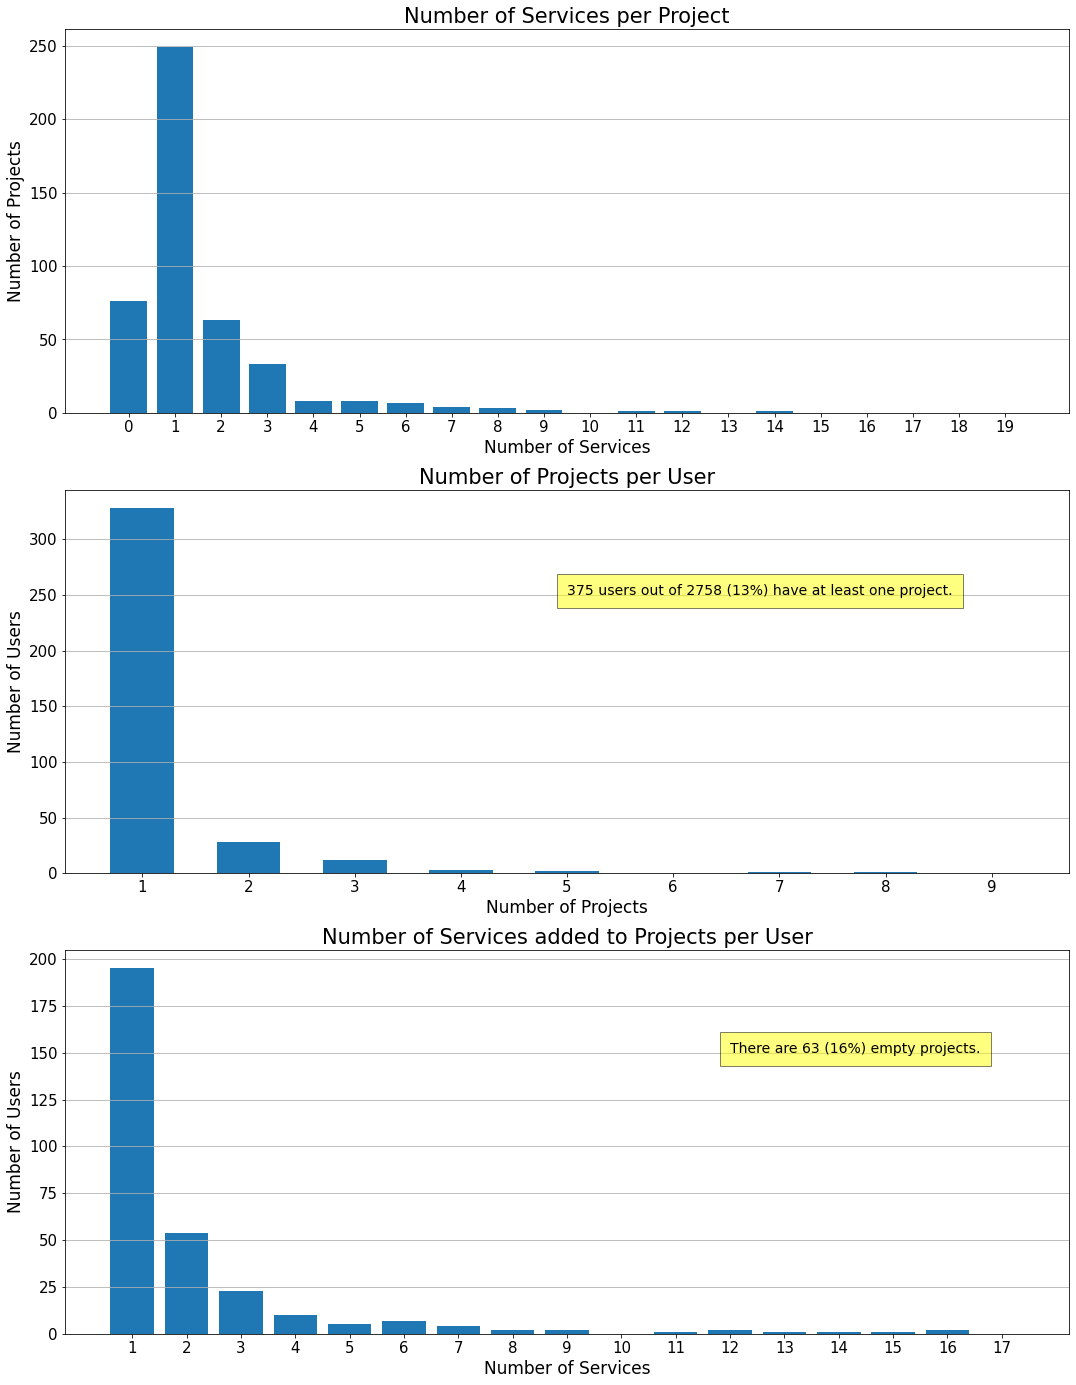

In [106]:
fig = plt.figure(figsize=(18, 24))
                 
                 
plt.subplot(3, 1, 1)
plt.hist(services_per_proj, bins=np.arange(-0.5,20.5), rwidth=0.8)
plt.xticks(np.arange(0,20), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Services", fontsize=17)
plt.ylabel("Number of Projects", fontsize=17)
plt.gca().yaxis.grid(True)
plt.title("Number of Services per Project", fontsize=21)


plt.subplot(3, 1, 2)
plt.hist(projects_per_user, bins=np.arange(0.5,10.5), rwidth=0.6)
plt.xticks(np.arange(1,10), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Projects", fontsize=17)
plt.ylabel("Number of Users", fontsize=17)
plt.gca().yaxis.grid(True)
plt.title("Number of Projects per User", fontsize=21)
plt.text(5, 250, f"{len(projects_per_user)} users out of 2758 ({int(len(projects_per_user) / 2758 * 100)}%) have at least one project.", 
         bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10}, fontsize=14)

plt.subplot(3, 1, 3)
plt.hist(number_of_services_added_to_projects_per_user, bins=np.arange(0.5,18.5), rwidth=0.8)
plt.xticks(np.arange(1,18), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Services", fontsize=17)
plt.ylabel("Number of Users", fontsize=17)
plt.gca().yaxis.grid(True)
plt.title("Number of Services added to Projects per User", fontsize=21)
plt.text(12, 150, f"There are {len(projects_per_user) - len(number_of_services_added_to_projects_per_user)} ({int(((len(projects_per_user) - len(number_of_services_added_to_projects_per_user)) / len(projects_per_user) * 100))}%) empty projects.", 
         bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10}, fontsize=14)

plt.show()